In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
    
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# 날짜 데이터 생성
from datetime import datetime

# 선형 회귀분석 (절편(intercept) 추가)
import statsmodels.api as sm
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima_model import ARIMA
matplotlib.rc("font", family = "Malgun Gothic")


In [51]:
df = pd.read_csv("test_data.csv", encoding='utf-8-sig', parse_dates = ["사용일자"])

In [52]:
df.loc[df['사용일자'] == "2019-02-18", '사용금액'] = 1266.75

In [53]:
df.head()

,사용일자,사용금액,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
0,2019-02-13,2000.00,1226.613708,1528.982619,1124.681033
1,2019-02-14,1187.00,1444.612767,1372.485877,1355.332863
2,2019-02-15,1506.00,1105.559288,1352.398389,1291.214797
3,2019-02-17,1530.00,1612.600220,1521.099225,1456.649018
4,2019-02-18,1266.75,1309.437304,1299.390346,1303.712350


In [54]:
df.사용일자 = pd.to_datetime(df.사용일자)
df = df.set_index("사용일자")
df.head()

,사용금액,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
사용일자,,,,
2019-02-13,2000.00,1226.613708,1528.982619,1124.681033
2019-02-14,1187.00,1444.612767,1372.485877,1355.332863
2019-02-15,1506.00,1105.559288,1352.398389,1291.214797
2019-02-17,1530.00,1612.600220,1521.099225,1456.649018
2019-02-18,1266.75,1309.437304,1299.390346,1303.712350


In [55]:
df.describe()

,사용금액,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
count,12.000000,12.000000,12.000000,12.000000
mean,1369.645833,1386.057569,1407.500702,1181.016326
std,466.565211,197.280330,105.333628,156.959096
min,657.000000,1105.559288,1292.456393,985.702729
25%,974.250000,1267.130569,1320.350384,1056.818971
50%,1383.375000,1359.019647,1362.442133,1138.458763
75%,1647.500000,1542.105555,1521.532626,1307.201941
max,2000.000000,1681.704970,1528.982619,1456.649018


In [56]:
df.head()

,사용금액,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
사용일자,,,,
2019-02-13,2000.00,1226.613708,1528.982619,1124.681033
2019-02-14,1187.00,1444.612767,1372.485877,1355.332863
2019-02-15,1506.00,1105.559288,1352.398389,1291.214797
2019-02-17,1530.00,1612.600220,1521.099225,1456.649018
2019-02-18,1266.75,1309.437304,1299.390346,1303.712350


In [57]:
df["앙살블"] = (df["ARIMA_Predictions"] + df["LSTM_Predictions"] + df["Prophet_Predictions"])/3

Text(0, 0.5, '사용금액')

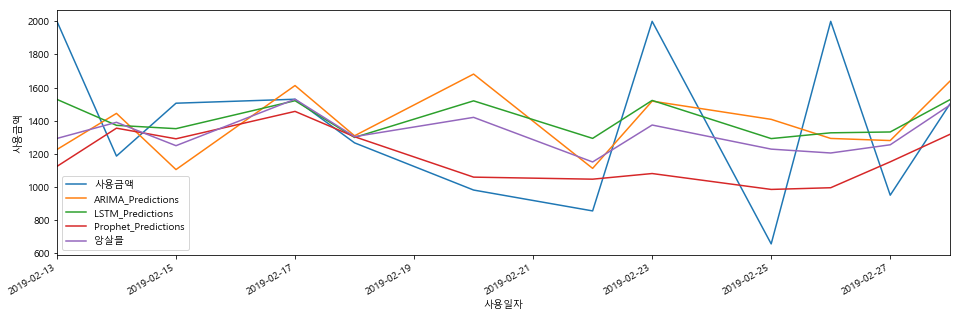

In [61]:
df['사용금액'].plot(figsize = (16,5), legend=True)
df['ARIMA_Predictions'].plot(legend = True);
df['LSTM_Predictions'].plot(legend = True);
df['Prophet_Predictions'].plot(legend = True);
df['앙살블'].plot(legend = True);
plt.ylabel('사용금액')